24.00
3.20 + 10.30i
-18.22 + 28.79i
-0.96 + 2.08i
( 2.23607  ,  2.03444)
2.83 -2.83i
2.20 +6.00i


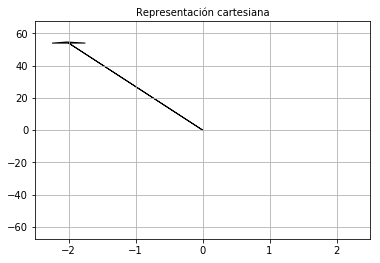

In [193]:
%run COMPLEJO.ipynb
import math
from math import pi

# ATENCIÓN, algunas operaciones como la multiplicación no son conmutativas debido a temas de implementación, así que al multiplicar una matriz y un complejo, se debe escribir B*c, siendo B la matriz y c el complejo, de otro modo resultará en error.

In [1]:
import math
class Matriz:
    def __init__(self, filas, columnas, matriz=None):
        self.columnas = columnas
        self.filas = filas
        self.matriz = []
        if(matriz == None):
            aux=[]
            for i in range(filas):
                for j in range(columnas):
                    aux.append(Complejo(0,0))
                self.matriz.append(aux)
                aux = []
            
            
        elif(filas == len(matriz) and len(matriz[0])==columnas):
            aux = []
             
            for i in range(filas):
                for j in range(columnas):
                    aux.append(Complejo.complejoDe(matriz[i][j]))
                self.matriz.append(aux)
                aux = []
                
             
                
                    
        else:
            raise Exception("Tamaño incorrecto")
    
    
    
    def __str__(self):
        answer = ""
        ans = [None]*self.columnas
        for i in range(self.filas):
            for j in range(self.columnas):
                ans[j] = str(self.matriz[i][j])
                
             
            answer = answer +str(ans)+"\n" 
            ans = ans.copy()
        return str(answer.strip())
    
    def __add__(self, b):
        if(not("Matriz" in  str(b.__class__))):
            raise Exception("Operación inválida")
        elif(not (self.filas == b.filas and self.columnas == b.columnas)):
            raise Exception("Tamaño inválido")
        else:
            ans = Matriz(self.filas,self.columnas)
            for i in range(self.filas):
                for j in range(self.columnas):
                    ans[i,j] = self[i,j] + b[i,j]
            return ans
                    
    def __getitem__(self,tup):
        return self.matriz[tup[0]][tup[1]]
    def __setitem__(self, tup, value):
        self.matriz[tup[0]][tup[1]]=value
    
    def multiplicar(self,b):
        if(self.columnas!=b.filas):
            raise Exception("El numero de columnas de la primera debe ser igual al numero de filas de la segunda")
        else:
            ans = Matriz(self.filas, b.columnas)
            for i in range(self.filas):
                for j in range(b.columnas):
                    ans[i,j]= self.obtenerSuma(b,i,j)
            return ans
                    
    def obtenerSuma(self,b,i,j):
        suma = Complejo(0,0)
        for t in range(self.columnas):
            suma+= self[i,t]*b[t,j]
        return suma
    def multiplicacionEscalar(self,b):
        ans = Matriz(self.filas, self.columnas)
        for i in range(self.filas):
            for j in range(self.columnas):
                ans[i,j] = b*self[i,j]
        return ans        
    def __mul__(self, b):
        if("Matriz" in  str(b.__class__)):
            return self.multiplicar(b)
        
        escalar = b
        if(type(b) is int or type(b) is float):
            escalar = Complejo(b,0)
        return self.multiplicacionEscalar(escalar)
        
    
    def __rmul__(self,b):
        return b.__mul__(self)
    def conjugada(self):
        ans = Matriz(self.filas, self.columnas)
        for i in range(self.filas):
            for j in range(self.columnas):
                ans[i,j] = self[i,j].conjugado()
        return ans
    
    def inversa(self):
        ans = Matriz(self.filas, self.columnas)
        for i in range(self.filas):
            for j in range(self.columnas):
                ans[i,j] = self[i,j]*-1
        return ans
        
    def transpuesta(self):
        ans = Matriz(self.columnas, self.filas)
        for j in range(self.columnas):
            for i in range(self.filas):
                ans[j,i] = self[i,j]
        return ans
    
    def adjunta(self):
        return self.conjugada().transpuesta()
    
    def esVector(self):
        return self.columnas==1
    
    def accion(self,b):
        if(not self.esVector()):
            raise Exception("No es un Vector")
        else:
            return b*self
        
    def productoInterno(self,b):
        if(not (self.esVector() and b.esVector())):
            raise Exception("No son vectores")
        return self.adjunta()*b
        
    def norma(self):
        return math.sqrt(self.productoInterno(self)[0,0].parteReal)
        
    def distancia(self,b):
        if(not (self.esVector() and b.esVector() and self.filas == b.filas)):
            raise Exception("Deben ser vectores y del mismo tamaño")
        ans = self + b*-1
        return ans.norma()
            
    def __eq__(self, other):
        ans = (self.filas == other.filas) and (self.columnas== self.columnas)
        
        for i in range(self.filas):
            if(not ans):
                break
            for j in range(self.columnas):
                if(not ans):
                    break
                ans = ans and (self[i,j]==other[i,j])
                
        return ans
    
    
    def __ne__(self, other):
        return not self.__eq__(other)
            
    def esIdentidad(self):
        ans = self.filas == self.columnas
        t=0
        zero = Complejo(0,0)
        uno = Complejo(1,0)
        for i in range(self.filas):
            if(not ans):
                break
            for j in range(self.columnas):
                if(not ans):
                    break
                if(j==t):
                    ans = ans and self[i,j] == uno
                else:
                    ans =  ans and self[i,j]==zero
            t+=1
                
        return ans
    
    def esUnitaria(self):
        return (self*self.adjunta()).esIdentidad()
    
    
    def esHermitiana(self):
        return self == self.adjunta()

In [165]:
a = Matriz(3,3, [[(3,0) , (1, 2), (0,-1)], [(2,-1) , (0, 0), (1,0)], [(0,0) , (4, 3), (0,1)]])

In [166]:
b = Matriz(3,1,[[(1,0)],[(1,-2)],[(0,-1)]])

In [167]:
A = Matriz(2,2,[[(1,0),(1,0)],[(1,0),(0,0)]])
print(A)

['1.00', '1.00']
['1.00', '0.00']


In [168]:
B= Matriz(2,2,[[(1,0),(0,0)],[(0,0),(1,0)]])

In [169]:
print(B)

['1.00', '0.00']
['0.00', '1.00']


In [170]:
print(a)
print()
print(a.inversa())

['3.00', '1.00 +2.00i', '-1.00i']
['2.00 -1.00i', '0.00', '1.00']
['0.00', '4.00 +3.00i', '1.00i']

['-3.00', '-1.00 -2.00i', '1.00i']
['-2.00 +1.00i', '-0.00', '-1.00']
['-0.00', '-4.00 -3.00i', '-1.00i']


In [172]:
print(a*2.77)

['8.31', '2.77 +5.54i', '-2.77i']
['5.54 -2.77i', '0.00', '2.77']
['0.00', '11.08 +8.31i', '2.77i']


In [49]:
print(a.adjunta())

['3.00', '2.00 +1.00i', '0.00']
['1.00 -2.00i', '0.00', '4.00 -3.00i']
['1.00i', '1.00', '-1.00i']


In [52]:
print(b.adjunta())

['1.00', '1.00 +2.00i', '1.00i']


In [4]:
z = Matriz(3,1,[[(1,1)],[(2,-5)],[(0,1)]])

NameError: name 'Complejo' is not defined

In [78]:
print(a*z)

['16.00 +2.00i']
['3.00 +2.00i']
['22.00 -14.00i']


In [202]:
lista = [[(1,2)], [(2,4)],[(1,-2)]]
t = Matriz(3,3, [[(3,0) , (1, 2), (0,-1)], [(2,-1) , (0, 0), (1,0)], [(0,0) , (4, 3), (0,1)]])
a= Matriz(3,1, lista)
b = Matriz(3,1,lista)
print(a.accion(t))
print("")
print(t*a)

['-5.00 +13.00i']
['5.00 +1.00i']
['-2.00 +23.00i']

['-5.00 +13.00i']
['5.00 +1.00i']
['-2.00 +23.00i']


In [3]:
print(a, a.filas , a.columnas)
print()
yyy= a.adjunta()
print(yyy, yyy.filas, yyy.columnas)

print()
a =Matriz(3,3,[[(1,0),(0,0),(0,0)], [(0,0),(1,0),(0,0)], [(0,0),(0,0),(1,0)]])
print(a==a)
print()
print(a.adjunta())
print(a.esIdentidad())

NameError: name 'a' is not defined